                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     1635.
Date:                Wed, 09 Oct 2024   Prob (F-statistic):          1.29e-319
Time:                        20:52:17   Log-Likelihood:                -17620.
No. Observations:                6607   AIC:                         3.524e+04
Df Residuals:                    6605   BIC:                         3.526e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            61.4570      0.149    411.921

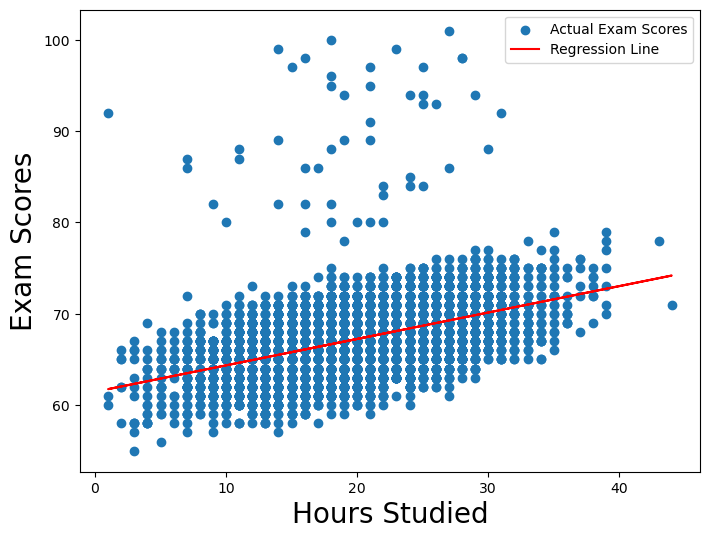

                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     3367.
Date:                Wed, 09 Oct 2024   Prob (F-statistic):               0.00
Time:                        20:52:17   Log-Likelihood:                -16989.
No. Observations:                6607   AIC:                         3.398e+04
Df Residuals:                    6605   BIC:                         3.400e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.5786      0.273    189.191      0.0

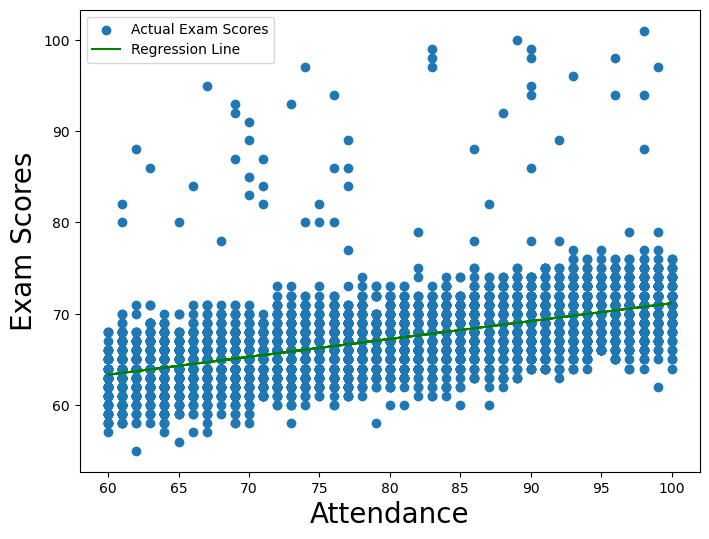

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Parse data
data = pd.read_csv('student_performance.csv')

# Define the independent and dependent variables
hours_studied = data['Hours_Studied']
exam_scores = data['Exam_Score']
attendance = data['Attendance']

# Add constant to hours_studied for statsmodels regression
x_constant = sm.add_constant(hours_studied)
result = sm.OLS(exam_scores, x_constant).fit()

# Show the regression summary for hours studied
print(result.summary())

# Define a function to check correlation between features and target
def check_correlation(data, target_column, features):
    correlation_results = {}
    for feature in features:
        correlation = data[feature].corr(data[target_column])
        correlation_results[feature] = correlation
    return correlation_results

# Check correlation for 'Hours_Studied' and 'Attendance'
correlation_results = check_correlation(data, 'Exam_Score', ['Hours_Studied', 'Attendance'])
print('All correlation results:', correlation_results)

# Perform linear regression for Hours Studied vs Exam Scores
hours_studied_reshaped = hours_studied.values.reshape(-1, 1)  # Reshape for sklearn

regressor_hours = LinearRegression()
regressor_hours.fit(hours_studied_reshaped, exam_scores)

# Scatter plot of Hours Studied vs Exam Scores with regression line
plt.figure(figsize=(8, 6))
plt.scatter(hours_studied, exam_scores, label="Actual Exam Scores")
plt.plot(hours_studied, regressor_hours.predict(hours_studied_reshaped), color='red', label="Regression Line")
plt.xlabel('Hours Studied', fontsize=20)
plt.ylabel('Exam Scores', fontsize=20)
plt.legend()
plt.show()

x_constant = sm.add_constant(attendance)
result = sm.OLS(exam_scores, x_constant).fit()

# Show the regression summary for hours studied
print(result.summary())
# Perform linear regression for Attendance vs Exam Scores
attendance_reshaped = attendance.values.reshape(-1, 1)  # Reshape for sklearn

regressor_attendance = LinearRegression()
regressor_attendance.fit(attendance_reshaped, exam_scores)

# Scatter plot of Attendance vs Exam Scores with regression line
plt.figure(figsize=(8, 6))
plt.scatter(attendance, exam_scores, label="Actual Exam Scores")
plt.plot(attendance, regressor_attendance.predict(attendance_reshaped), color='green', label="Regression Line")
plt.xlabel('Attendance', fontsize=20)
plt.ylabel('Exam Scores', fontsize=20)
plt.legend()
plt.show()


In [3]:

## training data

X = data[['Hours_Studied', 'Attendance']]
Y = data['Exam_Score']

print('shape of x', X.shape)
print('shape of y', Y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y)
print('Shape of Training data X',X_train.shape)
print('Shape of Training data y',y_train.shape)
print('Shape of Testing data X',X_test.shape)
print('Shape of Testing data y',y_test.shape)


shape of x (6607, 2)
shape of y (6607,)
Shape of Training data X (4955, 2)
Shape of Training data y (4955,)
Shape of Testing data X (1652, 2)
Shape of Testing data y (1652,)


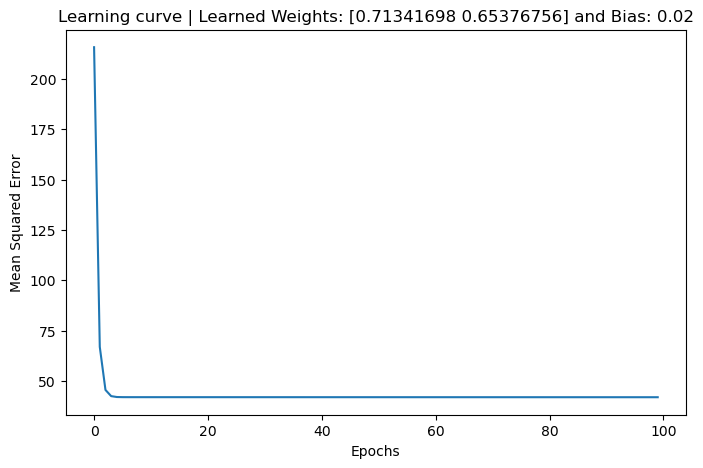

In [4]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Assuming you're using Pandas DataFrame

class Train_Model:
    # Constructor initializes the model parameters and data
    def __init__(self, x_train, x_test, y_train, y_test, learning_rate=1e-3, num_weights=2, bias=None):
        self.learning_rate = learning_rate  # Learning rate for gradient descent
        self.weight = np.random.rand(num_weights)  # Initialize weights randomly
        self.bias = bias if bias is not None else 0.001 * np.random.rand()  # Initialize bias, if not provided, default random value
        self.x_train = x_train  # Training data features
        self.x_test = x_test  # Test data features
        self.y_train = y_train  # Training data labels
        self.y_test = y_test  # Test data labels

    # Performs multiple linear regression: y = X * W + b
    def multiple_regression(self, features):
        y_hat = (features @ self.weight) + self.bias  # Matrix multiplication between features and weights, then add bias
        return y_hat
    
    # Computes the mean squared error (loss function)
    def loss_fn(self, ground_truth, predictions):
        return np.mean(np.square(ground_truth - predictions))  # Mean squared error (MSE)
    
    # Performs gradient descent to update weights and bias
    def gradient_descent(self, features, ground_truth, predictions):
        error = ground_truth - predictions  # Compute the error
        derivative_weights = []
        
        # Check if 'features' is a DataFrame and use appropriate indexing
        if isinstance(features, pd.DataFrame):
            for col in range(features.shape[1]):  # Iterate through the columns of the feature matrix
                derivative_weights.append(-2 * np.mean(error * features.iloc[:, col]))  # Compute derivative for each weight
        else:  # If 'features' is a NumPy array
            for col in range(features.shape[1]):  # Iterate through the columns of the feature matrix
                derivative_weights.append(-2 * np.mean(error * features[:, col]))  # Compute derivative for each weight
                
        derivative_bias = -2 * np.mean(error)  # Compute derivative for the bias
        return np.array(derivative_weights), derivative_bias

    # Returns the current weights and bias
    def get_model_coef(self):
        return self.weight, self.bias

    # Optimizes the model's weights and bias using the computed gradients
    def optimize_model_parameters(self, features, ground_truth, predictions):
        derivative_weights, derivative_bias = self.gradient_descent(features, ground_truth, predictions)  # Calculate gradients
        # Update weights
        for index in range(len(self.weight)):
            self.weight[index] -= self.learning_rate * derivative_weights[index]  # Adjust each weight
        # Update bias
        self.bias -= self.learning_rate * derivative_bias
    
    # Trains the model for a specified number of epochs
    def fit(self, X, y_true, epochs=10, to_print=False):
        history = {'epoch': [], 'loss': []}  # Track training history

        for epoch in range(epochs):
            y_hat = self.multiple_regression(X)  # Make predictions
            loss = self.loss_fn(y_true, y_hat)  # Compute the loss
            self.optimize_model_parameters(X, y_true, y_hat)  # Optimize model parameters
            if to_print:
                print(f'Epoch: {epoch}, Loss: {loss}')  # Print loss if requested
            # Save loss to history
            history['epoch'].append(epoch)
            history['loss'].append(loss)
        return history
    
    # Predicts values for a given feature set
    def predict(self, test_features):
        y_hat = self.multiple_regression(test_features)  # Make predictions on test data
        return y_hat

    # Evaluates the model on the test set
    def evaluate(self, test_features, y_test):
        y_hat = self.predict(test_features)  # Make predictions
        loss = self.loss_fn(y_test, y_hat)  # Calculate the loss
        return loss

# Assuming X_train, X_test, y_train, and y_test are pre-defined Pandas DataFrames or NumPy arrays
model1 = Train_Model(X_train, X_test, y_train, y_test, learning_rate=1e-4)  # Higher learning rate
history1 = model1.fit(X_train, y_train, epochs=100)

def plot_learning_curve(model, history):
    model_coef, bias = model.get_model_coef()
    plt.figure(figsize=(8, 5))
    plt.plot(history['loss'])  # Plot the loss values
    plt.title(f'Learning curve | Learned Weights: {model_coef} and Bias: {bias:.2f}')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.show()

plot_learning_curve(model1, history1)

In [5]:
baseline_mse = np.mean(np.square(y_test - np.mean(y_test)))  # Baseline: predict mean of y_test
print(f"Baseline MSE: {baseline_mse}")
# Use the test data to make predictions and evaluate the model
y_pred_test = model1.predict(X_test)  # Make predictions on the test data
test_loss = model1.evaluate(X_test, y_test)  # Evaluate the model using test data

print(f"Test loss (Mean Squared Error): {test_loss}")

Baseline MSE: 13.070145732811941
Test loss (Mean Squared Error): 39.0986037753769


In [6]:

from sklearn.linear_model import Ridge

# Example using Ridge regression with L2 regularization
ridge_model = Ridge(alpha=1.0)  # Alpha controls the strength of regularization
ridge_model.fit(X_train, y_train)
y_pred_test = ridge_model.predict(X_test)
test_mse = np.mean(np.square(y_test - y_pred_test))
print(f"Test MSE with L2 Regularization: {test_mse}")

Test MSE with L2 Regularization: 5.195396279138162


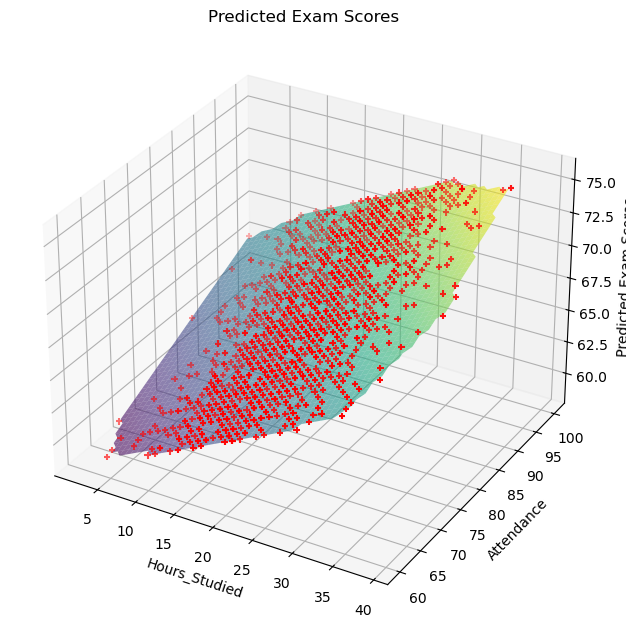

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Assuming X_test is a DataFrame with the features and predictions is your model's output

# Extract the features from the DataFrame
x = X_test['Hours_Studied']  # X-axis feature
y = X_test['Attendance']  # Y-axis feature
z = y_pred_test         # Z-axis: model's predictions

# Create a meshgrid for surface plotting
X_grid, Y_grid = np.meshgrid(np.linspace(min(x), max(x), 50),
                             np.linspace(min(y), max(y), 50))

# Interpolate the Z values on the grid for the surface
Z_grid = griddata((x, y), z, (X_grid, Y_grid), method='cubic')

# Create the figure and 3D subplot
fig = plt.figure(figsize=(26, 15))
ax = fig.add_subplot(1, 3, 1, projection='3d')

# Plot the test data points as red crosses
ax.scatter3D(x, y, z, marker='+', color='red', label='Test Data Points')

# Plot the surface using the interpolated Z values
ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='viridis', alpha=0.6)

# Add titles and labels
ax.set_title('Predicted Exam Scores ')
ax.set_xlabel('Hours_Studied')
ax.set_ylabel('Attendance')
ax.set_zlabel('Predicted Exam Scores')

# Show the plot
plt.show()


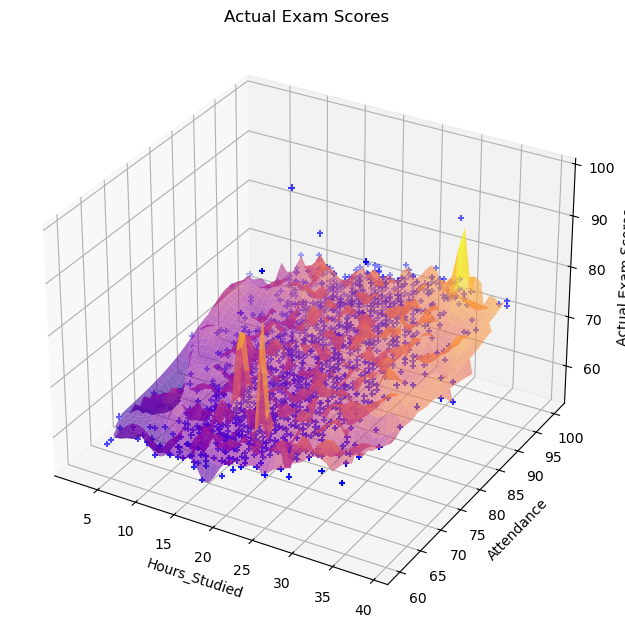

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Assuming X_test is a DataFrame with the features and y_test is the actual exam scores

# Extract the features from the DataFrame
x = X_test['Hours_Studied']  # X-axis feature
y = X_test['Attendance']      # Y-axis feature
z = y_test                    # Z-axis: actual exam scores

# Create a meshgrid for surface plotting
X_grid, Y_grid = np.meshgrid(np.linspace(min(x), max(x), 50),
                             np.linspace(min(y), max(y), 50))

# Interpolate the Z values on the grid for the surface
Z_grid = griddata((x, y), z, (X_grid, Y_grid), method='cubic')

# Create the figure and 3D subplot
fig = plt.figure(figsize=(26, 15))
ax = fig.add_subplot(1, 3, 1, projection='3d')

# Plot the actual test data points as blue crosses
ax.scatter3D(x, y, z, marker='+', color='blue', label='Actual Exam Scores')

# Plot the surface using the interpolated Z values
ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='plasma', alpha=0.6)

# Add titles and labels
ax.set_title('Actual Exam Scores')
ax.set_xlabel('Hours_Studied')
ax.set_ylabel('Attendance')
ax.set_zlabel('Actual Exam Scores')

# Show the plot
plt.show()
